**1. Importing Libraries**

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

**2. Loading Data**

In [2]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

**3. Preparing Data**

In [3]:
features = ['PetalLengthCm', 'PetalWidthCm']

X_train = train_data[features].values
y_train = train_data['Species'].values

X_test = test_data[features].values
true_labels = test_data['Species']

**4. Defining the Euclidean Distance Function**

In [4]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

**5. Defining the K-Nearest Neighbors Algorithm**

In [5]:
def k_nearest_neighbors(X_train, y_train, X_test, k=3):
    predictions = []

    for test_point in X_test:
        # Calculate distances from the test point to all training points
        distances = [(euclidean_distance(test_point, train_point), label)
                     for train_point, label in zip(X_train, y_train)]

        # Sort distances and get the k nearest labels
        sorted_distances = sorted(distances, key=lambda x: x[0])
        k_nearest_labels = [label for (_, label) in sorted_distances[:k]]

        # Predict the most common label among the k nearest labels
        prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
        predictions.append(prediction)

    return predictions

k_value = 3
predicted_labels = k_nearest_neighbors(X_train, y_train, X_test, k=k_value)

**6. Calculating Accuracy**

In [6]:
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 90.00%


**7. Visualization**

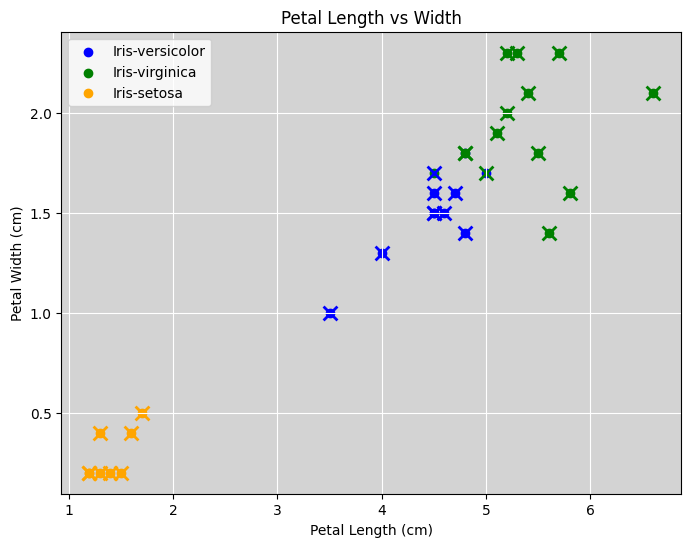

In [7]:
# Extracting unique class names for coloring
class_names = train_data['Species'].unique()
colors = {class_name: color for class_name, color in zip(class_names, ['blue', 'green', 'orange'])}

# Plotting
plt.figure(figsize=(8, 6))

# Plotting each class
for class_name in class_names:
    class_data = test_data[test_data['Species'] == class_name]
    plt.scatter(class_data['PetalLengthCm'], class_data['PetalWidthCm'],
                c=colors[class_name], label=class_name)

# Plotting predicted points
for i, label in enumerate(predicted_labels):
    plt.scatter(X_test[i, 0], X_test[i, 1],
                c=colors[label], marker='x', s=100, linewidths=2)

# Customizing the plot
plt.gca().set_facecolor('lightgrey')
plt.title('Petal Length vs Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.grid(color='white')
plt.show()